#Python Project 1 - NYC School Test Scores

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

## Data Cleaning

In [4]:
df.shape

(212331, 15)

In [5]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [6]:
df.info()
# All columns except 'Year' and 'Total Tested' are str data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [7]:
# Website explaining the "School DBN" codes:
# https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-
# Thanks, Tim

In [8]:
# Rename columns
df['Num_Fail']    = df['Number Scoring Below 65']
df['Perc_Fail']   = df['Percent Scoring Below 65']

df['Num_Pass']    = df['Number Scoring 65 or Above']
df['Perc_Pass']   = df['Percent Scoring 65 or Above']

df['Num_Excel']   = df['Number Scoring 80 or Above']
df['Perc_Excel']  = df['Percent Scoring 80 or Above']

df['Num_CR']      = df['Number Scoring CR']
df['Perc_CR']     = df['Percent Scoring CR']

In [9]:
# Remove duplicates after renaming
df.drop(df.columns[7:15], axis = 1, inplace=True)

In [10]:
df.head(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Num_Fail,Perc_Fail,Num_Pass,Perc_Pass,Num_Excel,Perc_Excel,Num_CR,Perc_CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na


###Cast all numeric data into appropriate data types
#####1. Replace null alternatives with -1
#####2. Use the .apply method to convert columns to numeric data types
#####3. Replace -1 values with numpy NaNs

In [11]:
# 1. Replace 's' and 'na' with null values
df.replace('s', -1, inplace=True)
df.replace('na', -1, inplace=True)

In [12]:
# Create lists of columns with similar data types
col_strings = ['School DBN', 'School Name', 'School Level', 'Regents Exam']
col_floats  = ['Mean Score', 'Perc_Fail', 'Perc_Pass', 'Perc_Excel', 'Perc_CR']
col_ints    = ['Total Tested', 'Num_Fail', 'Num_Pass', 'Num_Excel', 'Num_CR']

In [13]:
# 2. Convert to appropriate numeric data types
df[col_floats]  = df[col_floats].apply(np.float64)
df[col_ints]    = df[col_ints].apply(np.int64)

In [14]:
# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   School DBN    212331 non-null  object 
 1   School Name   212331 non-null  object 
 2   School Level  212331 non-null  object 
 3   Regents Exam  212321 non-null  object 
 4   Year          212331 non-null  int64  
 5   Total Tested  212331 non-null  int64  
 6   Mean Score    212331 non-null  float64
 7   Num_Fail      212331 non-null  int64  
 8   Perc_Fail     212331 non-null  float64
 9   Num_Pass      212331 non-null  int64  
 10  Perc_Pass     212331 non-null  float64
 11  Num_Excel     212331 non-null  int64  
 12  Perc_Excel    212331 non-null  float64
 13  Num_CR        212331 non-null  int64  
 14  Perc_CR       212331 non-null  float64
dtypes: float64(5), int64(6), object(4)
memory usage: 24.3+ MB


In [15]:
# 3. Replace -1 with NaN
df.replace(-1, np.NaN, inplace=True)

In [16]:
# UPDATE: The above cell seems to have been successful with fewer lines of code
# 3. Convert -1 values back to null values
# df[col_ints] = df[col_ints].replace(-1, np.NaN)
# df[col_floats] = df[col_floats].replace(-1, np.NaN)

In [17]:
# Verify
df.isnull().sum()

School DBN           0
School Name          0
School Level         0
Regents Exam        10
Year                 0
Total Tested         0
Mean Score       75222
Num_Fail         75222
Perc_Fail        75222
Num_Pass         75222
Perc_Pass        75222
Num_Excel        75222
Perc_Excel       75222
Num_CR          142680
Perc_CR         142680
dtype: int64

##EDA
###1. Explore data to see where comparison can be made
###2. Isolate target school to compare to larger dataset
###3. Change in test performance year-over-year
###4. How does this change stack up compared to the rest of schools in Queens?

####1. Exploration

In [18]:
# Filter all schools in Queens
queens = df[df['School DBN'].str.contains('Q')]

In [19]:
queens.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Num_Fail', 'Perc_Fail', 'Num_Pass',
       'Perc_Pass', 'Num_Excel', 'Perc_Excel', 'Num_CR', 'Perc_CR'],
      dtype='object')

In [20]:
queens.groupby(['Year'])['School Name'].count()

Year
2015    13202
2016    14225
2017    12206
Name: School Name, dtype: int64

In [21]:
queens.groupby(['Regents Exam'])['School Name'].count()

Regents Exam
Algebra2/Trigonometry              2139
Common Core Algebra                5574
Common Core Algebra2               1653
Common Core English                3219
Common Core Geometry               2871
English                            1775
Geometry                           1612
Global History and Geography       3147
Integrated Algebra                 1821
Living Environment                 4755
Physical Settings/Chemistry        2474
Physical Settings/Earth Science    3436
Physical Settings/Physics          1534
U.S. History and Government        3623
Name: School Name, dtype: int64

In [22]:
# Filtering larger dataframe in order to compare scores year-over-year
queens_2015 = queens[queens['Year'] == 2015]
queens_2016 = queens[queens['Year'] == 2016]
queens_2017 = queens[queens['Year'] == 2017]

In [23]:
q15 = queens_2015.groupby(['Regents Exam'])['Mean Score'].mean()
q16 = queens_2016.groupby(['Regents Exam'])['Mean Score'].mean()
q17 = queens_2017.groupby(['Regents Exam'])['Mean Score'].mean()

####Abandoning this attempt. Original plan was as follows:
- create 2 new columns comparing the mean scores of each test year-over-year
* problem: when filtering/subsetting dataframe by year, they are no longer identical as not the same number of tests were administered each year, and thus the idices not longer match


In [24]:
# Reset index to match the rest of the dataframe subsets
# queens_strings = queens[col_strings]

In [25]:
# Reset new data frame indices to match in order to perform mathematical operations on df series
# queens_2015.reset_index(inplace=True)
# queens_2016.reset_index(inplace=True)
# queens_2017.reset_index(inplace=True)
# queens_strings.reset_index(inplace=True)

In [26]:
# queens_ints_diff = queens_2016[col_ints] - queens_2015[col_ints]
# queens_floats_diff = queens_2016[col_floats] - queens_2015[col_floats]

In [27]:
# queens_diff2016 = queens_strings + queens_ints_diff + queens_floats_diff

In [28]:
# queens_diff2016 = pd.concat([queens[col_strings], queens_ints_diff, queens_floats_diff], axis=1)

####2. Target School - Frank Sinatra
#####GOAL: to compare the year-over-year change in average test scores for Common Core Algebra

In [29]:
# School where my wife works (occassionally) - her FT school doesn't appear to be included in this data set
sinatra = queens[queens['School Name'].str.contains('Sinatra')]

In [30]:
# Check to see that we have only 1 school in current DF
sinatra['School Name'].value_counts()

Frank Sinatra School of the Arts High School    431
Name: School Name, dtype: int64

####3. Calculate change in test performance year-over-year

In [31]:
# Filtering larger dataframe in order to compare scores year-over-year
sinatra_2015 = sinatra[sinatra['Year'] == 2015]
sinatra_2016 = sinatra[sinatra['Year'] == 2016]
sinatra_2017 = sinatra[sinatra['Year'] == 2017]

In [92]:
s15 = sinatra_2015.groupby(['Regents Exam'])['Mean Score'].mean()
s16 = sinatra_2016.groupby(['Regents Exam'])['Mean Score'].mean()
s17 = sinatra_2017.groupby(['Regents Exam'])['Mean Score'].mean()
print(s15)

Regents Exam
Algebra2/Trigonometry              64.412500
Common Core Algebra                68.490909
Common Core Geometry               69.645455
English                            87.150000
Geometry                           74.772727
Global History and Geography       79.800000
Integrated Algebra                 61.700000
Living Environment                 83.836364
Physical Settings/Chemistry        65.870000
Physical Settings/Earth Science    76.610000
Physical Settings/Physics          74.300000
U.S. History and Government        90.425000
Name: Mean Score, dtype: float64


In [93]:
sinatra_2015.groupby(['Regents Exam'])['School Name'].count()
# Multiple of each exam given each year?

Regents Exam
Algebra2/Trigonometry              12
Common Core Algebra                13
Common Core Geometry               13
English                            12
Geometry                           13
Global History and Geography       12
Integrated Algebra                  9
Living Environment                 13
Physical Settings/Chemistry        12
Physical Settings/Earth Science    12
Physical Settings/Physics          11
U.S. History and Government        12
Name: School Name, dtype: int64

In [96]:
# Selecting a single exam to compare - CCA was the first that was administered each year
s15_cca = sinatra_2015[sinatra_2015['Regents Exam'] == 'Common Core Algebra']
s16_cca = sinatra_2016[sinatra_2016['Regents Exam'] == 'Common Core Algebra']
s17_cca = sinatra_2017[sinatra_2017['Regents Exam'] == 'Common Core Algebra']

In [105]:
# Calculate the average score of all Frank Sinatra students taking the CCA exam for each year
avg_s15_cca = s15_cca['Mean Score'].mean()
avg_s16_cca = s16_cca['Mean Score'].mean()
avg_s17_cca = s17_cca['Mean Score'].mean()
print(avg_s15_cca, avg_s16_cca, avg_s17_cca)

68.49090909090908 73.26363636363637 73.54444444444445


In [106]:
# Calculate the percent change year to year
# % change = (current-previous)/previous
change_s16 = round(((avg_s16_cca - avg_s15_cca)/avg_s15_cca), 4)
change_s17 = round(((avg_s17_cca - avg_s16_cca)/avg_s16_cca), 4)
print(change_s16, change_s17)

0.0697 0.0038


Generate the same figures for all Queens schools

In [53]:
q15_cca = queens_2015[queens_2015['Regents Exam'] == 'Common Core Algebra']
q16_cca = queens_2016[queens_2016['Regents Exam'] == 'Common Core Algebra']
q17_cca = queens_2017[queens_2017['Regents Exam'] == 'Common Core Algebra']

In [54]:
avg_q15_cca = q15_cca['Mean Score'].mean()
avg_q16_cca = q16_cca['Mean Score'].mean()
avg_q17_cca = q17_cca['Mean Score'].mean()

In [55]:
change_q16 = round(((avg_q16_cca - avg_q15_cca)/avg_q15_cca), 4)
change_q17 = round(((avg_q17_cca - avg_q16_cca)/avg_q16_cca), 4)

####4. Visualizations

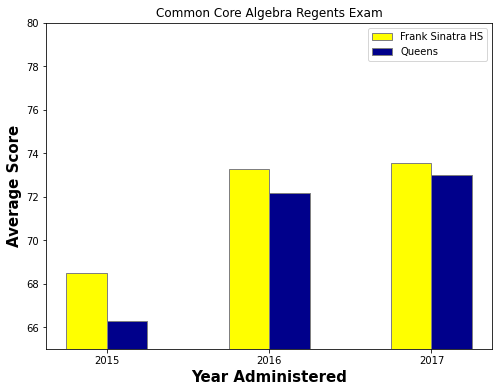

In [80]:
years = [2015, 2016, 2017]

plt.subplots(figsize = (8, 6))
barWidth = .25

# set height of bar
sinatra_cca = [avg_s15_cca, avg_s16_cca, avg_s17_cca]
queens_cca  = [avg_q15_cca, avg_q16_cca, avg_q17_cca]

# set position of bar on X axis
br1 = np.arange(len(sinatra_cca))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, sinatra_cca, color='yellow', width=barWidth, edgecolor='grey', label='Frank Sinatra HS')
plt.bar(br2, queens_cca, color='darkblue', width=barWidth, edgecolor='grey', label='Queens')

# Adding Xticks
plt.xlabel('Year Administered', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Score', fontweight ='bold', fontsize = 15)
plt.ylim(65,80)
plt.xticks([r + barWidth/2 for r in range(len(sinatra_cca))], years)
plt.title('Common Core Algebra Regents Exam')
 
plt.legend()
plt.show()

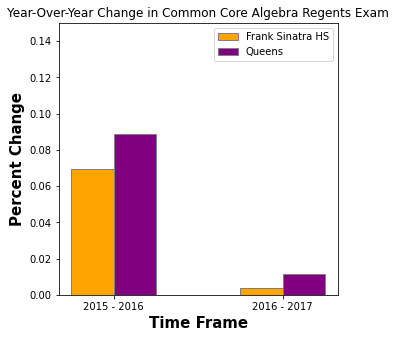

In [91]:
plt.subplots(figsize = (5, 5))
barWidth = .25

# set height of bar
sinatra_change = [change_s16, change_s17]
queens_change  = [change_q16, change_q17]

# set position of bar on X axis
br1 = np.arange(len(sinatra_change))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, sinatra_change, color='orange', width=barWidth, edgecolor='grey', label='Frank Sinatra HS')
plt.bar(br2, queens_change, color='purple', width=barWidth, edgecolor='grey', label='Queens')

# Adding Xticks
plt.xlabel('Time Frame', fontweight ='bold', fontsize = 15)
plt.ylabel('Percent Change', fontweight ='bold', fontsize = 15)
plt.ylim(0,.15)
plt.xticks([r + barWidth/2 for r in range(len(sinatra_change))], ['2015 - 2016', '2016 - 2017'])
plt.title('Year-Over-Year Change in Common Core Algebra Regents Exam')
 
plt.legend()
plt.show()

#CONCLUSION:

Ultimately, the improvement of Frank Sinatra students in the 2 years following the initial data was worse than that of Queens students as a whole. We can see this fairly clearly in the second figure showing the purple bars to be greater than the orange ones.

However, seeing as this is a relative comparison, we should probably look at the starting point. In fact, the test scores of Frank Sinatra students in the initial year's data show that they scored significantly better than the average Queens student. Therefore, it is expected that the improvement year-over-year wouldn't be as much as those who scored lower to begin with.

I was hoping to show the teaching effectiveness by comparing the test scores year-over-year (which I understand isn't the only, or the best, metric for doing this, but I believe it was a good way to use this data set). Had I been able to perform similar comparisons/visualizations for each regents exam, I believe the project would have been more successful.

#REFLECTION:

I had high hopes with this project; however, I was grounded pretty quickly. 

My initial plan was to plot the average score and the change in average score year-over-year for EACH of the regents exams given. This proved to be so difficult because of mismatching shapes in the filtered dataframes. Some schools gave many, many instances of each exam, some schools didn't give each exam, some were missing data, etc.

Converting the dataset into datatypes that could be used in mathematical operations also proved to be challenging. 